# Desafio 4

Neste desafio, vamos praticar um pouco sobre testes de hipóteses. Utilizaremos o _data set_ [2016 Olympics in Rio de Janeiro](https://www.kaggle.com/rio2016/olympic-games/), que contém dados sobre os atletas das Olimpíadas de 2016 no Rio de Janeiro.

Esse _data set_ conta com informações gerais sobre 11538 atletas como nome, nacionalidade, altura, peso e esporte praticado. Estaremos especialmente interessados nas variáveis numéricas altura (`height`) e peso (`weight`). As análises feitas aqui são parte de uma Análise Exploratória de Dados (EDA).

> Obs.: Por favor, não modifique o nome das funções de resposta.

## _Setup_ geral

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as sct
import seaborn as sns
import statsmodels.api as sm

In [2]:
#%matplotlib inline

from IPython.core.pylabtools import figsize


figsize(12, 8)

sns.set()

In [3]:
athletes = pd.read_csv("athletes.csv")

In [4]:
def get_sample(df, col_name, n=100, seed=42):
    """Get a sample from a column of a dataframe.
    
    It drops any numpy.nan entries before sampling. The sampling
    is performed without replacement.
    
    Example of numpydoc for those who haven't seen yet.
    
    Parameters
    ----------
    df : pandas.DataFrame
        Source dataframe.
    col_name : str
        Name of the column to be sampled.
    n : int
        Sample size. Default is 100.
    seed : int
        Random seed. Default is 42.
    
    Returns
    -------
    pandas.Series
        Sample of size n from dataframe's column.
    """
    np.random.seed(seed)
    
    random_idx = np.random.choice(df[col_name].dropna().index, size=n, replace=False)
    
    return df.loc[random_idx, col_name]

## Inicia sua análise a partir daqui

In [5]:
# Sua análise começa aqui.
athletes.head()

,id,name,nationality,sex,dob,height,weight,sport,gold,silver,bronze
0,736041664,A Jesus Garcia,ESP,male,10/17/69,1.72,64.0,athletics,0,0,0
1,532037425,A Lam Shin,KOR,female,9/23/86,1.68,56.0,fencing,0,0,0
2,435962603,Aaron Brown,CAN,male,5/27/92,1.98,79.0,athletics,0,0,1
3,521041435,Aaron Cook,MDA,male,1/2/91,1.83,80.0,taekwondo,0,0,0
4,33922579,Aaron Gate,NZL,male,11/26/90,1.81,71.0,cycling,0,0,0


In [6]:
athletes.describe()

,id,height,weight,gold,silver,bronze
count,1.153800e+04,11208.000000,10879.000000,11538.000000,11538.000000,11538.000000
mean,4.999885e+08,1.766282,72.068205,0.057722,0.056769,0.061016
std,2.908648e+08,0.112719,16.177334,0.255910,0.239147,0.243320
min,1.834700e+04,1.210000,31.000000,0.000000,0.000000,0.000000
25%,2.450997e+08,1.690000,60.000000,0.000000,0.000000,0.000000
50%,5.002011e+08,1.760000,70.000000,0.000000,0.000000,0.000000
75%,7.539874e+08,1.840000,81.000000,0.000000,0.000000,0.000000
max,9.999878e+08,2.210000,170.000000,5.000000,2.000000,2.000000


In [7]:
athletes.dtypes

id               int64
name            object
nationality     object
sex             object
dob             object
height         float64
weight         float64
sport           object
gold             int64
silver           int64
bronze           int64
dtype: object

In [8]:
athletes.isnull().sum()

id               0
name             0
nationality      0
sex              0
dob              1
height         330
weight         659
sport            0
gold             0
silver           0
bronze           0
dtype: int64

## Questão 1

Considerando uma amostra de tamanho 3000 da coluna `height` obtida com a função `get_sample()`, execute o teste de normalidade de Shapiro-Wilk com a função `scipy.stats.shapiro()`. Podemos afirmar que as alturas são normalmente distribuídas com base nesse teste (ao nível de significância de 5%)? Responda com um boolean (`True` ou `False`).

False

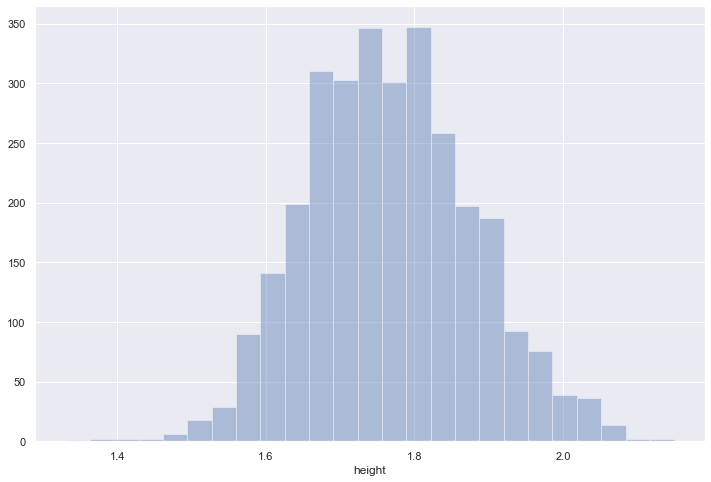

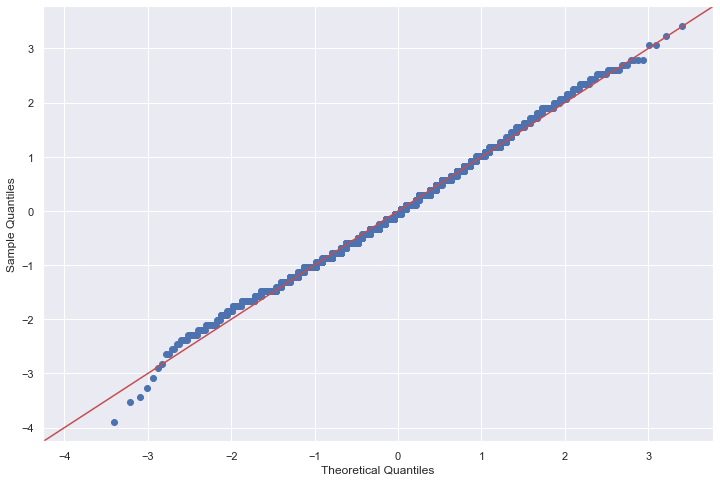

In [9]:
# Function defined with plots
def plots(data, hist=False, boxplot=False, qqplot=False):
    # Plottings
    if boxplot:
        # Boxplot
        data.plot(kind='box')
        plt.show()
    if hist:
        # Histogram
        sns.distplot(data, kde=False, bins=25)
    if qqplot:
        # QQ plot
        sm.qqplot(data, fit=True, line="45")

# Getting a sample for questions 1 and 2
height_sample = get_sample(athletes, "height", n=3000, seed=42)  
alpha = 0.05  # Significance level for questions 1,2,3 and 4
def q1():
    # Retorne aqui o resultado da questão 1.
    # The Shapiro-Wilk test for normality.
    W_value, pvalue = sct.shapiro(height_sample)                    # p-value for the hypothesis test                                                    # Significance level
    plots(height_sample, hist=True, qqplot=True)                    # function to do plots of the distribution 
    # Return the test evaluation (False ou True (Normal))
    return bool(pvalue > alpha)
    
    #pass
q1()

__Para refletir__:

* Plote o histograma dessa variável (com, por exemplo, `bins=25`). A forma do gráfico e o resultado do teste são condizentes? Por que?
    
    _O histograma mostra uma distribuição próxima a normal. No entanto, o teste de normalidade de Shapiro indica um resultado contrário, considerando um nível de significância de 0.05. Esse resultado pode estar associado ao critério do teste, que nesse caso indica um distribuição não normal._
    
    
* Plote o qq-plot para essa variável e a analise.
    
    _A partir da visualização do qq-plot, os dados parecem se comportar seguindo um distribuição normal._
    
    
* Existe algum nível de significância razoável que nos dê outro resultado no teste? (Não faça isso na prática. Isso é chamado _p-value hacking_, e não é legal).
    
    _Apenas para um nível de significância muito baixo a hipótese nula não seria rejeitada._

## Questão 2

Repita o mesmo procedimento acima, mas agora utilizando o teste de normalidade de Jarque-Bera através da função `scipy.stats.jarque_bera()`. Agora podemos afirmar que as alturas são normalmente distribuídas (ao nível de significância de 5%)? Responda com um boolean (`True` ou `False`).

In [10]:
def q2():
    # Retorne aqui o resultado da questão 2.
    # The Jarque-Bera goodness of fit test on sample data.
    jb_value, pvalue = sct.jarque_bera(height_sample)               # p-value for the hypothesis test
    
    # Return the test evaluation (False ou True (Normal))
    return bool(pvalue > alpha)
    
    #pass
q2()

False

__Para refletir__:

* Esse resultado faz sentido?

    _Faz sentido uma vez que está de acordo com o teste de normalidade Shapiro-Wilk_.

## Questão 3

Considerando agora uma amostra de tamanho 3000 da coluna `weight` obtida com a função `get_sample()`. Faça o teste de normalidade de D'Agostino-Pearson utilizando a função `scipy.stats.normaltest()`. Podemos afirmar que os pesos vêm de uma distribuição normal ao nível de significância de 5%? Responda com um boolean (`True` ou `False`).

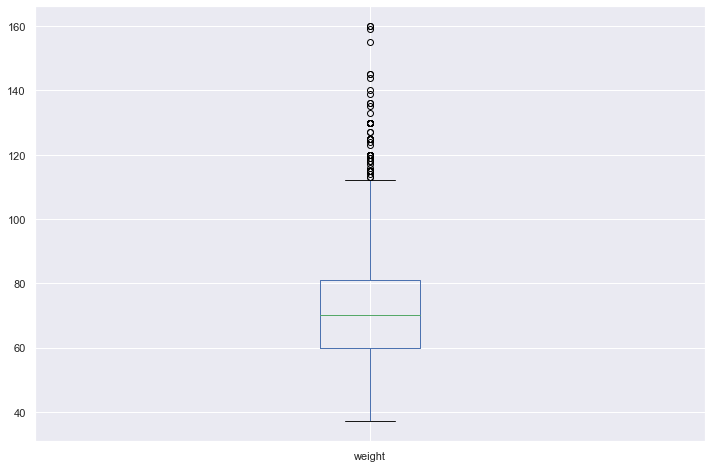

False

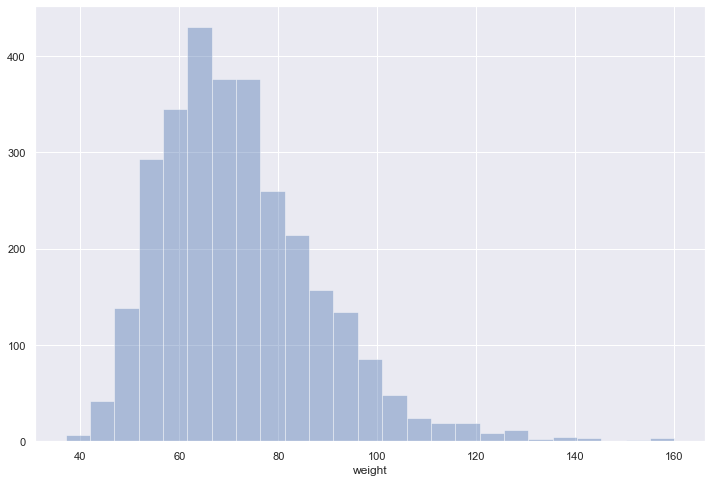

In [11]:
# Getting a sample for questions 3 and 4
weight_sample = get_sample(athletes, "weight", n=3000, seed=42) # Getting a sample   
def q3():
    # Retorne aqui o resultado da questão 3.
    #  D’Agostino and Pearson’s test
    jb_value, pvalue = sct.normaltest(weight_sample)               # p-value for the hypothesis test
    plots(weight_sample, hist=True, boxplot=True)                  # function to do plots of the distribution 
    # Return the test evaluation (False ou True (Normal))
    return bool(pvalue > alpha)
    #pass
q3()

__Para refletir__:

* Plote o histograma dessa variável (com, por exemplo, `bins=25`). A forma do gráfico e o resultado do teste são condizentes? Por que?

    _Nesse caso o histograma não mostra dados próximos de uma distribuição normal. E o teste rejeita a hipótese nula, a qual indica que os dados seguem uma distribuição normal. Dessa forma, a observação visual dos dados e o teste estatístico indicam que os dados d altura não podem ser representados através de uma ditribuição normal._
    

* Um _box plot_ também poderia ajudar a entender a resposta.

    _Observa-se muitos valores acima do limite superior._

## Questão 4

Realize uma transformação logarítmica em na amostra de `weight` da questão 3 e repita o mesmo procedimento. Podemos afirmar a normalidade da variável transformada ao nível de significância de 5%? Responda com um boolean (`True` ou `False`).

False

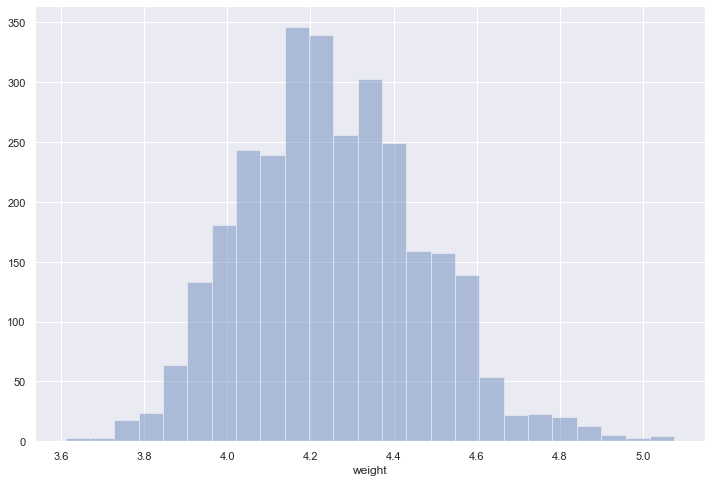

In [12]:
def q4():
    # Retorne aqui o resultado da questão 4.
    log_weight_sample = np.log(weight_sample)
    #  D’Agostino and Pearson’s test
    jb_value, pvalue = sct.normaltest(log_weight_sample)           # p-value for the hypothesis test
    plots(log_weight_sample, hist=True)                            # function to do plots of the distribution 
    # Return the test evaluation (False ou True (Normal))
    return bool(pvalue > alpha)
    #pass
q4()

__Para refletir__:

* Plote o histograma dessa variável (com, por exemplo, `bins=25`). A forma do gráfico e o resultado do teste são condizentes? Por que?

    _Nesse caso, o histograma apresenta um comportamento próximo a uma distribuição normal, mas o teste resultou em rejeição da hipótese nula, ou seja, da hipótese de ser uma distribuição normal._


* Você esperava um resultado diferente agora?

    _O histograma apresenta uma distribuição próxima a normal. No entanto, de forma similar ao obtido na questão 1 e 2, o teste estatístico rejeito a hipótese de normalidade._

> __Para as questão 5 6 e 7 a seguir considere todos testes efetuados ao nível de significância de 5%__.

## Questão 5

Obtenha todos atletas brasileiros, norte-americanos e canadenses em `DataFrame`s chamados `bra`, `usa` e `can`,respectivamente. Realize um teste de hipóteses para comparação das médias das alturas (`height`) para amostras independentes e variâncias diferentes com a função `scipy.stats.ttest_ind()` entre `bra` e `usa`. Podemos afirmar que as médias são estatisticamente iguais? Responda com um boolean (`True` ou `False`).

In [13]:
# Getting the datas for the questions 5, 6 and 7
athletes_bra = athletes[athletes['nationality'] == 'BRA']
athletes_usa = athletes[athletes['nationality'] == 'USA']
athletes_can = athletes[athletes['nationality'] == 'CAN']

alpha = 0.05   # Significance level adopted in all tests.

def q5():
    # Retorne aqui o resultado da questão 5.

    # Hypothesis test for the height of Brazilian and American athletes (The two-tailed p-value)
    statistic, pvalue = sct.ttest_ind(athletes_bra['height'], athletes_usa['height'], equal_var=False, nan_policy='omit')
    
    # HO -> the two averages are statistically equal
    # H1 -> the two averages are statistically non equal
        # If pvalue < alpha  - Reject H0
        # If pvalue >= alpha- Don't Reject H0 
        # This test is a two-tailed test and the pvalue calculated is already
        # multiplied by factor of two. In this case it is necessary to compare 
        # obtained pvalue direcly with the significance level alpha = 5%
        
    return bool(pvalue>alpha)
    #pass
q5()


False

## Questão 6

Repita o procedimento da questão 5, mas agora entre as alturas de `bra` e `can`. Podemos afimar agora que as médias são estatisticamente iguais? Reponda com um boolean (`True` ou `False`).

In [14]:
def q6():
    # Retorne aqui o resultado da questão 6.
    # Hypothesis test for the height of Brazilian and Canadiens athletes (The two-tailed p-value)
    statistic, pvalue = sct.ttest_ind(athletes_bra['height'], athletes_can['height'], equal_var=False, nan_policy='omit')
    
    # HO -> the two averages are statistically equal
    # H1 -> the two averages are statistically non equal
        # If pvalue < alpha  - Reject H0
        # If pvalue >= alpha - Don't Reject H0 
        # This test is a two-tailed test and the pvalue calculated is already
        # multiplied by factor of two. In this case it is necessary to compare 
        # obtained pvalue direcly with the significance level alpha = 5%
        
    return bool(pvalue>alpha)
    #pass
q6()


True

## Questão 7

Repita o procedimento da questão 6, mas agora entre as alturas de `usa` e `can`. Qual o valor do p-valor retornado? Responda como um único escalar arredondado para oito casas decimais.

In [15]:
def q7():
    # Retorne aqui o resultado da questão 7.
    # Hypothesis test for the height of Americans and Canadiens athletes (The two-tailed p-value)
    statistic, pvalue = sct.ttest_ind(athletes_usa['height'], athletes_can['height'], equal_var=False, nan_policy='omit')
    
    # HO -> the two averages are statistically equal
    # H1 -> the two averages are statistically non equal
        # If pvalue < alpha  - Reject H0
        # If pvalue >= alpha - Don't Reject H0 
        # This test is a two-tailed test and the pvalue calculated is already
        # multiplied by factor of two. In this case it is necessary to compare 
        # obtained pvalue direcly with the significance level alpha = 5%
        
    return round(float(pvalue),8)
    #pass
q7()


0.00046601

In [16]:
print('Americans athletes height average = ', athletes_usa['height'].mean())
print('Americans athletes height standard deviation = ', athletes_usa['height'].std())
print('Americans athletes height n = ', athletes_usa['height'].count())

print('Canadians athletes height average = ', athletes_can['height'].mean())
print('Canadians athletes height standard deviation = ', athletes_can['height'].std())
print('Canadians athletes height n = ', athletes_can['height'].count())

Americans athletes height average =  1.787767857142857
Americans athletes height standard deviation =  0.1189617414290981
Americans athletes height n =  560
Canadians athletes height average =  1.75859375
Canadians athletes height standard deviation =  0.11803600730444999
Canadians athletes height n =  320


__Para refletir__:

* O resultado faz sentido?

    _O resultado apresenta um p-valor inferior ao nível de significância do teste, indicando a rejeição da hipótese nula, ou seja, rejeitando a hipótese de que as médias das duas amostras são iguais. Considerando o baixo valor de desvio padrão e o grande número de individuos em ambas as amostras, o resultado faz sentido uma vez que as médias não são próximas. Com o teste, é possível concluir que realmente as médias não são estatisticamente iguais._

* Você consegue interpretar esse p-valor?
 
    _Considerando H0 verdadeira, o p-valor é a probabilidade da estatística do teste T ser um valor igual 
    ou superior ao resultado obtido no teste t*. Dessa forma, como foi obtido um p-valor muito baixo (0.00046) 
    pode-se interpretar que será muito raro obter o resultado obtido t* assumindo a hipótese nula verdadeira. 
    Dessa forma, esse resultado corrobora com uma evidência muito forte para rejeição de H0._


* Você consegue chegar a esse valor de p-valor a partir da variável de estatística?

    _O p-valor pode ser obtido a partir da função SF (survival function), a qual retorna o valor de 1-cdf._
    

In [17]:
statistic, pvalue_test = sct.ttest_ind(athletes_usa['height'], athletes_can['height'], equal_var=False, nan_policy='omit')
print('A estatística do teste obtida é t =', statistic)
dof =  athletes_usa['height'].count() + athletes_can['height'].count()  - 2  # It is not the real degree of freedon 
                                                                             # This is the degree of freedon for a two samples
                                                                             # with equal variances.
pvalue = sct.t.sf(statistic, dof)*2   # you double the calculated value because it is a bicaudal test.
print("O p-valor estimado é", round(pvalue,8))
print("Valor próximo ao obtido no teste, p-valor_teste = ", round(pvalue_test,8))
print("A diferença é consequência da aproximação realizada no cálculo do número de graus de liberdade")

A estatística do teste obtida é t = 3.516987632488539
O p-valor estimado é 0.00045885
Valor próximo ao obtido no teste, p-valor_teste =  0.00046601
A diferença é consequência da aproximação realizada no cálculo do número de graus de liberdade
